# I. Load dataset

In [2]:
import pandas as pd
from tqdm import tqdm

def load_dataframe_parts(base_filename, num_parts):
    df_parts = []
    
    # Load each part and append to the list
    for i in tqdm(range(num_parts), desc=f'Loading {base_filename} from pickle', unit='file'):
        try:
            df_part = pd.read_pickle(f"/kaggle/input/retail/processed/processed/{base_filename}_part{i + 1}.pkl")
            df_parts.append(df_part)
        except FileNotFoundError:
            print(f"File not found: {base_filename}_part{i + 1}.pkl")
        except Exception as e:
            print(f"Error loading {base_filename}_part{i + 1}: {e}")
    
    # Concatenate all parts into a single DataFrame
    combined_df = pd.concat(df_parts, ignore_index=True)
    
    return combined_df

# Reload train_final_merged from 20 parts
train = load_dataframe_parts('train_final_merged', num_parts=20)

# Reload test_final_merged from 10 parts
test = load_dataframe_parts('test_final_merged', num_parts=10)

Loading test_final_merged from pickle: 100%|██████████| 10/10 [00:17<00:00,  1.74s/file]


In [3]:
train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,sell_price
0,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,Saturday,1,2011,no_event,no_event,no_event,no_event,0.46
1,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,Saturday,1,2011,no_event,no_event,no_event,no_event,1.56
2,HOBBIES_1_010_CA_1_evaluation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011,no_event,no_event,no_event,no_event,3.17
3,HOBBIES_1_012_CA_1_evaluation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011,no_event,no_event,no_event,no_event,5.98
4,HOBBIES_1_015_CA_1_evaluation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,Saturday,1,2011,no_event,no_event,no_event,no_event,0.70


In [4]:
train['revenue']=train['sales']*train['sell_price']

In [5]:
test['revenue']=test['sales']*test['sell_price']

In [6]:
train['date'] = pd.to_datetime(train['date'])
train_data = train[['date', 'revenue']]

In [7]:
import pandas as pd

# Ensure 'date' is in datetime format
train_data['date'] = pd.to_datetime(train_data['date'])

# Extract the year from the 'date' column
train_data['year'] = train_data['date'].dt.year

# Count the occurrences of each year
year_counts = train_data['year'].value_counts().sort_index()

# Display the counts of each year
print(year_counts)


/tmp/ipykernel_30/1045600923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['date'] = pd.to_datetime(train_data['date'])


year
2011     5108030
2012     7225558
2013     8869330
2014    10289280
2015     3228493
Name: count, dtype: int64


/tmp/ipykernel_30/1045600923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['year'] = train_data['date'].dt.year


In [8]:
test['date'] = pd.to_datetime(test['date'])
test_data = test[['date', 'revenue']]

In [9]:
# Grouping by date and summing revenue
train_data = train_data.groupby(['date'])['revenue'].sum().reset_index()

# Convert 'date' to datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Format 'date' to 'mm-yy'
train_data['date'] = train_data['date'].dt.strftime('%m-%y')

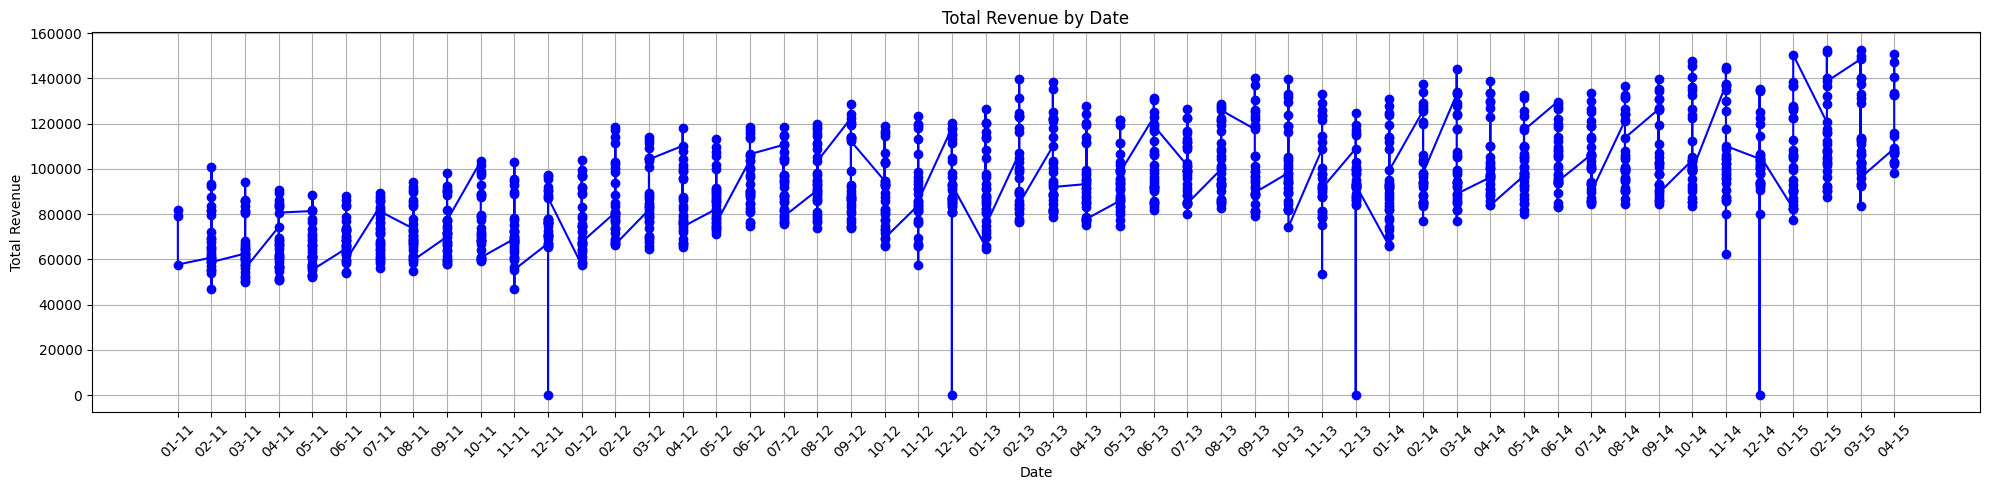

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the line graph
plt.figure(figsize=(20, 5))
plt.plot(train_data['date'], train_data['revenue'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Total Revenue by Date')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

- Sales is significantly low in some dates in December

In [11]:
train_data = train[['date', 'revenue']]
# Grouping by date and summing revenue
train_data = train.groupby(['date'])['revenue'].sum().reset_index()

# Convert 'date' to datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Format 'date' to 'mm-yy'
train_data['date'] = train_data['date'].dt.strftime('%m-%y')

# Now if you want to format 'date' to just 'mm'
# First, you should not convert it to string; instead, just work with the datetime object:
train_data['date'] = pd.to_datetime(train_data['date'], format='%m-%y')

# Now you can extract just the month
train_data['month'] = train_data['date'].dt.strftime('%m')
train_data['month'] = train_data['month'].astype(int)


/tmp/ipykernel_30/1610386774.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december['date'] = pd.to_datetime(december['date'], format='%m-%y')
/tmp/ipykernel_30/1610386774.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december['day'] = december['date'].dt.day


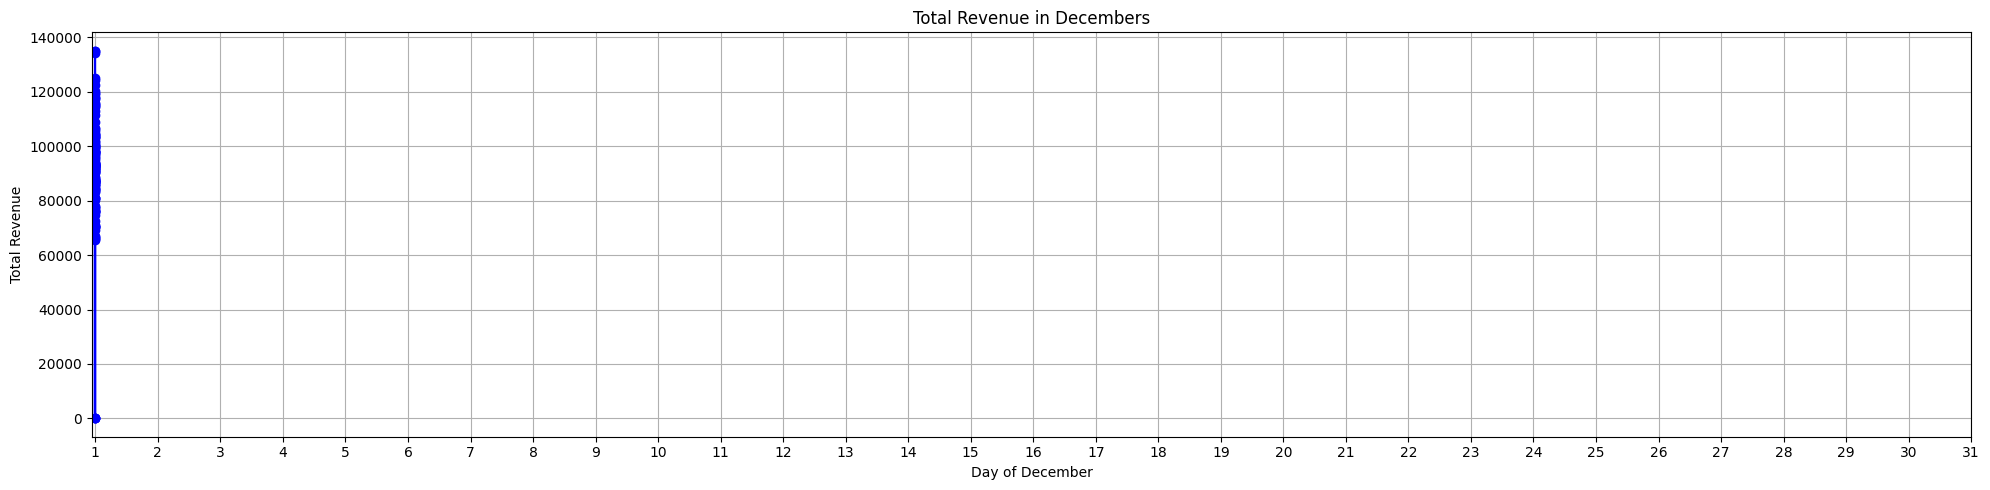

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for December
december = train_data[train_data['month'] == 12]

# Ensure 'date' is in datetime format
december['date'] = pd.to_datetime(december['date'], format='%m-%y')

# Extract day from the 'date' for plotting
december['day'] = december['date'].dt.day

# Plotting the line graph
plt.figure(figsize=(20, 5))
plt.plot(december['day'], december['revenue'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Total Revenue in Decembers')
plt.xlabel('Day of December')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 32))  # Set x-ticks for all days in December
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
from prophet import Prophet

In [14]:
train_data = train[['date', 'revenue']]
train_data

,date,revenue
0,2011-01-29,5.52
1,2011-01-29,3.12
2,2011-01-29,0.00
3,2011-01-29,0.00
4,2011-01-29,2.80
...,...,...
34720686,2015-04-18,5.76
34720687,2015-04-18,0.00
34720688,2015-04-18,0.00
34720689,2015-04-18,0.00


In [15]:
# Aggregate revenue by date
df_aggregated = train_data.groupby('date', as_index=False)['revenue'].sum()

In [16]:
# Convert 'date' to datetime
df_aggregated['date'] = pd.to_datetime(df_aggregated['date'])

# II. Prepare data 

In [17]:
def split_sets_by_time(df, target_col, test_ratio=0.2):
    """Split sets by indexes for an ordered dataframe

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe
    target_col : str
        Name of the target column
    test_ratio : float
        Ratio used for the validation and testing sets (default: 0.2)

    Returns
    -------
    Numpy Array
        Features for the training set
    Numpy Array
        Target for the training set
    Numpy Array
        Features for the validation set
    Numpy Array
        Target for the validation set
    Numpy Array
        Features for the testing set
    Numpy Array
        Target for the testing set
    """

    df_copy = df.copy()
    target = df_copy.pop(target_col)
    cutoff = int(len(df_copy) * (1 - test_ratio))

    X_train, y_train = subset_x_y(target=target, features=df_copy, start_index=0, end_index=cutoff)
    X_val, y_val = subset_x_y(target=target, features=df_copy, start_index=cutoff, end_index=int(len(df_copy) * (1 - test_ratio/2)))
    X_test, y_test = subset_x_y(target=target, features=df_copy, start_index=int(len(df_copy) * (1 - test_ratio/2)), end_index=len(df_copy))

    return X_train, y_train, X_val, y_val, X_test, y_test


In [18]:
# Solution
def subset_x_y(target, features, start_index:int, end_index:int):
    """Keep only the rows for X and y (optional) sets from the specified indexes

    Parameters
    ----------
    target : pd.DataFrame
        Dataframe containing the target
    features : pd.DataFrame
        Dataframe containing all features
    features : int
        Index of the starting observation
    features : int
        Index of the ending observation

    Returns
    -------
    pd.DataFrame
        Subsetted Pandas dataframe containing the target
    pd.DataFrame
        Subsetted Pandas dataframe containing all features
    """

    return features[start_index:end_index], target[start_index:end_index]

In [19]:
# Prepare the aggregated DataFrame
df_aggregated.rename(columns={'revenue': 'target'}, inplace=True)

In [20]:
# Split the data
X_train, y_train, X_val, y_val, X_test, y_test = split_sets_by_time(df_aggregated, target_col='target')

In [21]:
df_train = pd.DataFrame(X_train, columns=['date'])
df_train['y'] = y_train
df_train.rename(columns={'date': 'ds'}, inplace=True)

In [22]:
df_val = pd.DataFrame(X_val, columns=['date'])
df_val['y'] = y_val
df_val.rename(columns={'date': 'ds'}, inplace=True)

In [23]:
df_test = pd.DataFrame(X_test, columns=['date'])
df_test['y'] = y_test
df_test.rename(columns={'date': 'ds'}, inplace=True)

# III. Base line model

In [24]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the DummyRegressor with a 'mean' strategy (other strategies include 'median', 'constant', etc.)
baseline_model = DummyRegressor(strategy='mean')

# Fit the baseline model on the training data
baseline_model.fit(X_train, y_train)

# Predict on the test data
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model using mean squared error (MSE)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
print(f"Baseline MSE: {mse_baseline}")

# Evaluate the baseline model using Mean Absolute Error (MAE)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
print(f"Baseline MAE: {mae_baseline}")

# Calculate R-squared (coefficient of determination)
r2_baseline = r2_score(y_test, y_pred_baseline)
print(f"Baseline R-squared: {r2_baseline}")

Baseline MSE: 834003433.9031801
Baseline MAE: 22668.419553676158
Baseline R-squared: -0.9754551183168061


# III. Training prophet model

In [25]:
from prophet import Prophet

In [26]:
prophet = Prophet()

In [27]:
prophet.fit(df_train)

06:49:46 - cmdstanpy - INFO - Chain [1] start processing
06:49:46 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
train_predict=prophet.predict(df_train)
test_predict=prophet.predict(df_test)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics for the training set
mse_train = mean_squared_error(df_train['y'], train_predict['yhat'])
mae_train = mean_absolute_error(df_train['y'], train_predict['yhat'])
r2_train = r2_score(df_train['y'], train_predict['yhat'])

# Calculate metrics for the test set
mse_test = mean_squared_error(df_test['y'], test_predict['yhat'])
mae_test = mean_absolute_error(df_test['y'], test_predict['yhat'])
r2_test = r2_score(df_test['y'], test_predict['yhat'])

# Print the results
print(f"Training Set: MSE = {mse_train}, MAE = {mae_train}, R-squared = {r2_train}")
print(f"Test Set: MSE = {mse_test}, MAE = {mae_test}, R-squared = {r2_test}")

Training Set: MSE = 74285063.20372951, MAE = 6202.844562509261, R-squared = 0.8064914956487436
Test Set: MSE = 162281591.75084537, MAE = 9025.457394382542, R-squared = 0.6156130922237639


In [30]:
import pickle


# Save the model as a pickle file
with open('/kaggle/working/prophet.pkl', 'wb') as file:
    pickle.dump(prophet, file)

print(f"Model saved as {file}")

Model saved as <_io.BufferedWriter name='/kaggle/working/prophet.pkl'>


In [31]:
forecast = prophet.predict(df_val)

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


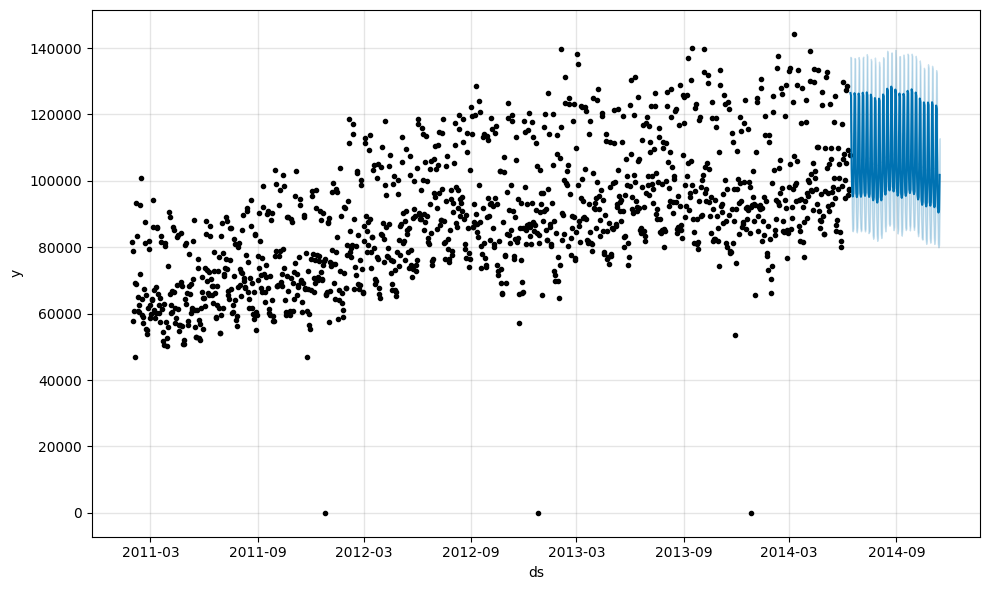

In [32]:
fig1 = prophet.plot(forecast)

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

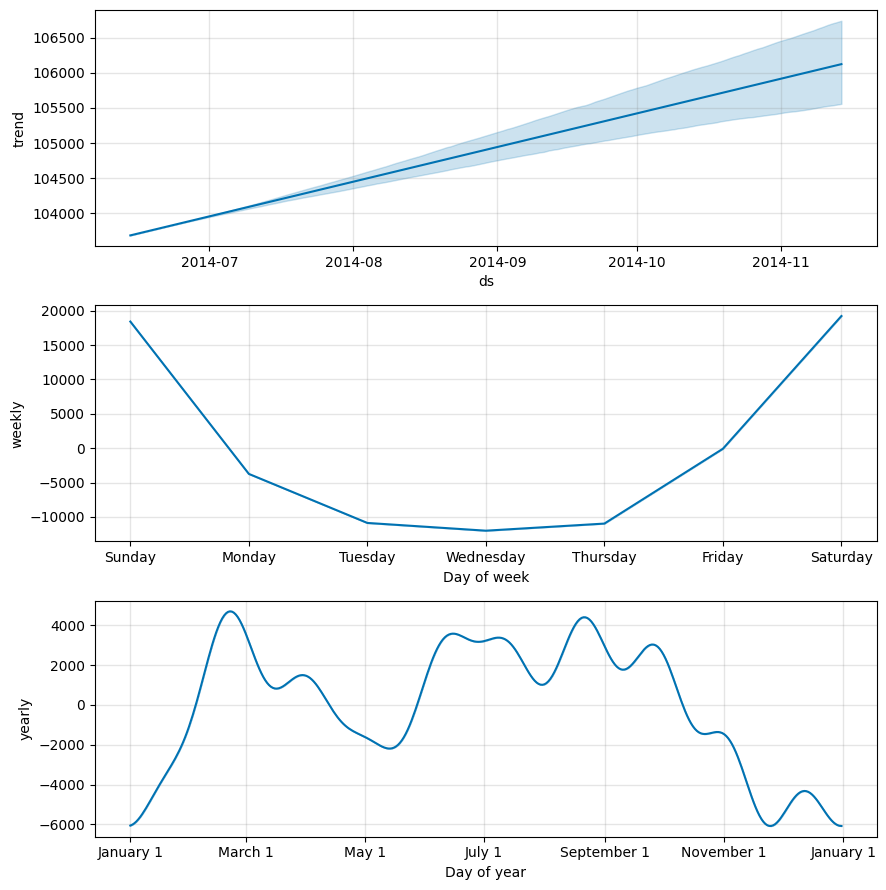

In [33]:
fig2 = prophet.plot_components(forecast)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def print_regressor_scores(predictions, actuals, set_name='Validation'):
    # Calculate regression metrics
    mae = mean_absolute_error(actuals, predictions)
    mse = mean_squared_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)

    # Print the scores
    print(f"Scores for {set_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")


In [35]:
print_regressor_scores(forecast['yhat'], df_val['y'], set_name='Validation')

Scores for Validation:
Mean Absolute Error (MAE): 6993.5878
Mean Squared Error (MSE): 78237161.9392
R-squared (R2): 0.7188


# IV. Training prophet model with cross validation

**[4.1]** Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')


In [36]:
from prophet.diagnostics import cross_validation

In [37]:
cv_results = cross_validation(prophet, initial='365 days', period='7 days', horizon='7 days')

  0%|          | 0/123 [00:00<?, ?it/s]

06:49:49 - cmdstanpy - INFO - Chain [1] start processing
06:49:49 - cmdstanpy - INFO - Chain [1] done processing
06:49:49 - cmdstanpy - INFO - Chain [1] start processing
06:49:49 - cmdstanpy - INFO - Chain [1] done processing
06:49:49 - cmdstanpy - INFO - Chain [1] start processing
06:49:49 - cmdstanpy - INFO - Chain [1] done processing
06:49:49 - cmdstanpy - INFO - Chain [1] start processing
06:49:49 - cmdstanpy - INFO - Chain [1] done processing
06:49:49 - cmdstanpy - INFO - Chain [1] start processing
06:49:49 - cmdstanpy - INFO - Chain [1] done processing
06:49:49 - cmdstanpy - INFO - Chain [1] start processing
06:49:49 - cmdstanpy - INFO - Chain [1] done processing
06:49:49 - cmdstanpy - INFO - Chain [1] start processing
06:49:49 - cmdstanpy - INFO - Chain [1] done processing
06:49:50 - cmdstanpy - INFO - Chain [1] start processing
06:49:50 - cmdstanpy - INFO - Chain [1] done processing
06:49:50 - cmdstanpy - INFO - Chain [1] start processing
06:49:50 - cmdstanpy - INFO - Chain [1]

**[4.2]** Calculate performance metrics on the cross validation

In [38]:
from prophet.diagnostics import performance_metrics
metrics_results = performance_metrics(cv_results)
metrics_results

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,7.530669e+07,8677.942981,6550.850586,0.055927,0.047924,0.056899,0.796748
1,2 days,1.069907e+08,10343.630914,8545.574007,0.072846,0.060825,0.074560,0.666667
2,3 days,6.639429e+07,8148.269245,6673.054460,0.073010,0.066059,0.072565,0.845528
3,4 days,1.229697e+08,11089.171256,7410.321794,27.612812,0.077392,0.096101,0.813008
4,5 days,1.357942e+08,11653.078860,7712.715869,20.804280,0.081561,0.100285,0.772358
5,6 days,8.041842e+07,8967.631661,7264.485715,0.091621,0.076369,0.087642,0.780488
6,7 days,5.974418e+07,7729.435907,6155.438470,0.066237,0.055125,0.064906,0.861789


**[4.3]** Import plot_cross_validation_metric from fbprophet.plot

In [39]:
from prophet.plot import plot_cross_validation_metric

**[4.4]** Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


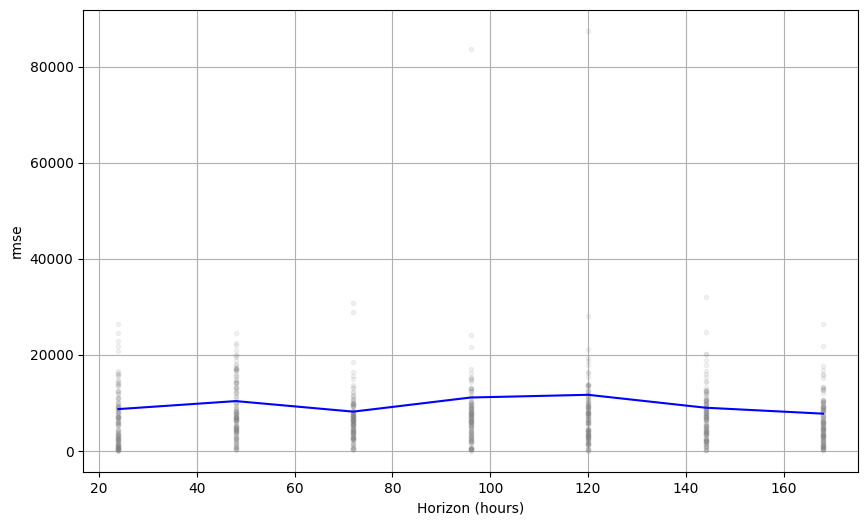

In [40]:
fig3 = plot_cross_validation_metric(cv_results, metric='rmse')

### V. Train Prophet model with holidays

**[5.1]** Instantiate the Prophet class into a variable called prophet1

In [41]:
prophet1 = Prophet()

**[5.2]** Add the US holidays component to the model

In [42]:
prophet1.add_country_holidays(country_name='US')

**[5.3]** Fit the model with the prepared data

In [43]:
prophet1.fit(df_train)

06:50:17 - cmdstanpy - INFO - Chain [1] start processing
06:50:17 - cmdstanpy - INFO - Chain [1] done processing


**[5.4]** Save the fitted model into the folder `models` as a file called `prophet_holiday.joblib`

In [44]:
import pickle


# Save the model as a pickle file
with open('/kaggle/working/prophet_holiday.pkl', 'wb') as file:
    pickle.dump(prophet, file)

print(f"Model saved as {file}")

Model saved as <_io.BufferedWriter name='/kaggle/working/prophet_holiday.pkl'>


**[5.5]** Forecast the future dates with predict() and save the results in a variable called forecast1

In [45]:
forecast1 = prophet1.predict(df_train)

In [46]:
# Calculate metrics for the training set
mse_train = mean_squared_error(df_train['y'],forecast1['yhat'])
mae_train = mean_absolute_error(df_train['y'], forecast1['yhat'])
r2_train = r2_score(df_train['y'], forecast1['yhat'])

In [47]:
# Print the results
print(f"Training Set: MSE = {mse_train}, MAE = {mae_train}, R-squared = {r2_train}")
print(f"Test Set: MSE = {mse_test}, MAE = {mae_test}, R-squared = {r2_test}")

Training Set: MSE = 51003124.929462105, MAE = 5725.244191686733, R-squared = 0.8671396644669612
Test Set: MSE = 162281591.75084537, MAE = 9025.457394382542, R-squared = 0.6156130922237639


**[5.6]** Print the components of this model on the predictions

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

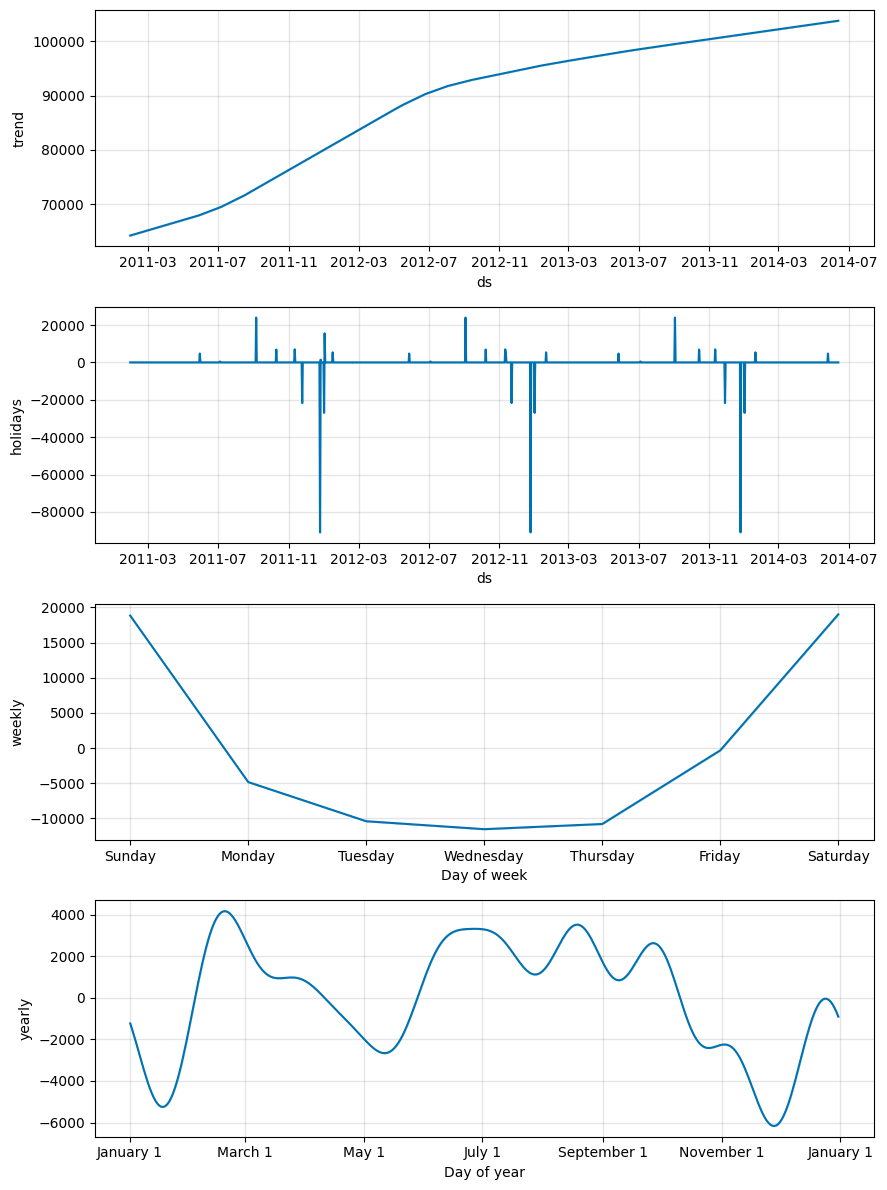

In [48]:
fig4 = prophet1.plot_components(forecast1)

**[5.7]** Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [49]:
cv_results1 = cross_validation(prophet1, initial='365 days', period='7 days', horizon='7 days')

  0%|          | 0/123 [00:00<?, ?it/s]

06:50:19 - cmdstanpy - INFO - Chain [1] start processing
06:50:19 - cmdstanpy - INFO - Chain [1] done processing
06:50:19 - cmdstanpy - INFO - Chain [1] start processing
06:50:19 - cmdstanpy - INFO - Chain [1] done processing
06:50:20 - cmdstanpy - INFO - Chain [1] start processing
06:50:20 - cmdstanpy - INFO - Chain [1] done processing
06:50:20 - cmdstanpy - INFO - Chain [1] start processing
06:50:20 - cmdstanpy - INFO - Chain [1] done processing
06:50:20 - cmdstanpy - INFO - Chain [1] start processing
06:50:20 - cmdstanpy - INFO - Chain [1] done processing
06:50:20 - cmdstanpy - INFO - Chain [1] start processing
06:50:20 - cmdstanpy - INFO - Chain [1] done processing
06:50:20 - cmdstanpy - INFO - Chain [1] start processing
06:50:20 - cmdstanpy - INFO - Chain [1] done processing
06:50:21 - cmdstanpy - INFO - Chain [1] start processing
06:50:21 - cmdstanpy - INFO - Chain [1] done processing
06:50:21 - cmdstanpy - INFO - Chain [1] start processing
06:50:21 - cmdstanpy - INFO - Chain [1]

**[5.8]** Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


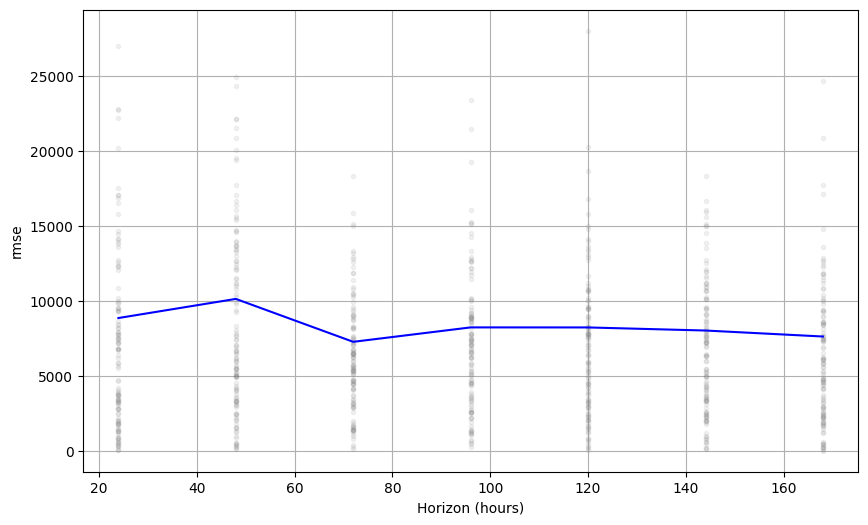

In [50]:
fig5 = plot_cross_validation_metric(cv_results1, metric='rmse')

### 6. Train Prophet model with monthly seasonality

**[6.1]** Instantiate the Prophet class into a variable called prophet2 and add the US holidays component to the model

In [51]:
prophet2 = Prophet()
prophet2.add_country_holidays(country_name='US')

**[6.2]** Add a monthly seasonal component to the model with period=30.5 and fourier_order=5

In [52]:
prophet2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

**[6.3]** Fit the model with the prepared data

In [53]:
prophet2.fit(df_train)

06:50:56 - cmdstanpy - INFO - Chain [1] start processing
06:50:56 - cmdstanpy - INFO - Chain [1] done processing


**[6.4]** Save the fitted model into the folder `models` as a file called `prophet_month.pkl`

In [54]:
import pickle


# Save the model as a pickle file
with open('/kaggle/working/prophet_month.pkl', 'wb') as file:
    pickle.dump(prophet, file)

print(f"Model saved as {file}")

Model saved as <_io.BufferedWriter name='/kaggle/working/prophet_month.pkl'>


**[6.5]** Forecast the future dates with predict() and save the results in a variable called forecast2

In [55]:
train_predict=prophet2.predict(df_train)
test_predict=prophet2.predict(df_test)

**[6.6]** Calculate metrics for the train set

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics for the training set
mse_train = mean_squared_error(df_train['y'], train_predict['yhat'])
mae_train = mean_absolute_error(df_train['y'], train_predict['yhat'])
r2_train = r2_score(df_train['y'], train_predict['yhat'])

In [57]:
# Calculate metrics for the test set
mse_test = mean_squared_error(df_test['y'], test_predict['yhat'])
mae_test = mean_absolute_error(df_test['y'], test_predict['yhat'])
r2_test = r2_score(df_test['y'], test_predict['yhat'])

In [58]:
# Print the results
print(f"Training Set: MSE = {mse_train}, MAE = {mae_train}, R-squared = {r2_train}")
print(f"Test Set: MSE = {mse_test}, MAE = {mae_test}, R-squared = {r2_test}")

Training Set: MSE = 30475325.65427251, MAE = 4069.0902433929928, R-squared = 0.9206134526559886
Test Set: MSE = 93182711.08608213, MAE = 7257.823749227966, R-squared = 0.7792835663851633


**[6.6]** Print the components of this model on the predictions

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

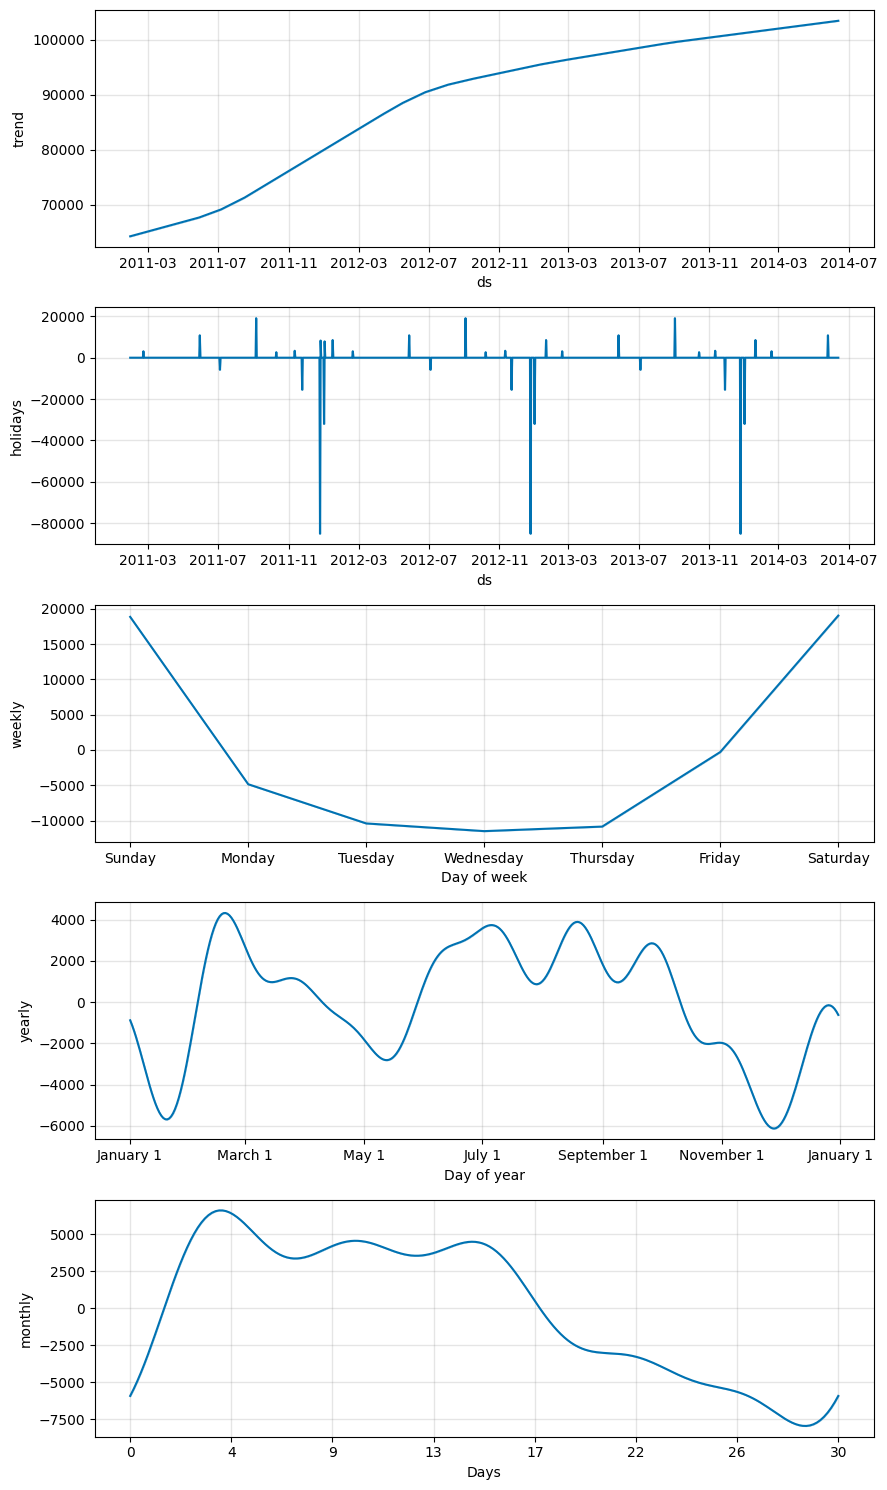

In [59]:
fig6 = prophet2.plot_components(train_predict)

**[6.7]** Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [60]:
cv_results2 = cross_validation(prophet2, initial='365 days', period='7 days', horizon='7 days')

  0%|          | 0/123 [00:00<?, ?it/s]

06:50:59 - cmdstanpy - INFO - Chain [1] start processing
06:50:59 - cmdstanpy - INFO - Chain [1] done processing
06:50:59 - cmdstanpy - INFO - Chain [1] start processing
06:50:59 - cmdstanpy - INFO - Chain [1] done processing
06:50:59 - cmdstanpy - INFO - Chain [1] start processing
06:50:59 - cmdstanpy - INFO - Chain [1] done processing
06:51:00 - cmdstanpy - INFO - Chain [1] start processing
06:51:00 - cmdstanpy - INFO - Chain [1] done processing
06:51:00 - cmdstanpy - INFO - Chain [1] start processing
06:51:00 - cmdstanpy - INFO - Chain [1] done processing
06:51:00 - cmdstanpy - INFO - Chain [1] start processing
06:51:00 - cmdstanpy - INFO - Chain [1] done processing
06:51:00 - cmdstanpy - INFO - Chain [1] start processing
06:51:00 - cmdstanpy - INFO - Chain [1] done processing
06:51:00 - cmdstanpy - INFO - Chain [1] start processing
06:51:01 - cmdstanpy - INFO - Chain [1] done processing
06:51:01 - cmdstanpy - INFO - Chain [1] start processing
06:51:01 - cmdstanpy - INFO - Chain [1]

**[6.8]** Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


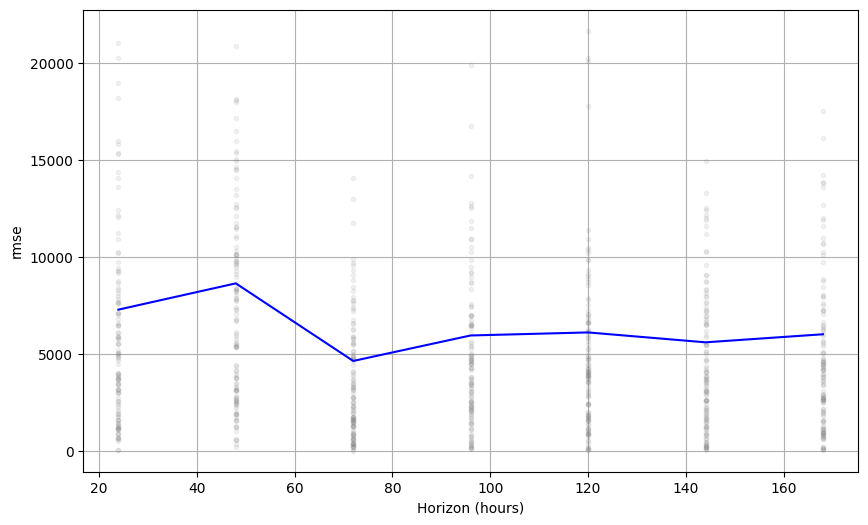

In [61]:
fig7 = plot_cross_validation_metric(cv_results2, metric='rmse')

In [62]:
forecast = prophet2.predict(df_val)

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

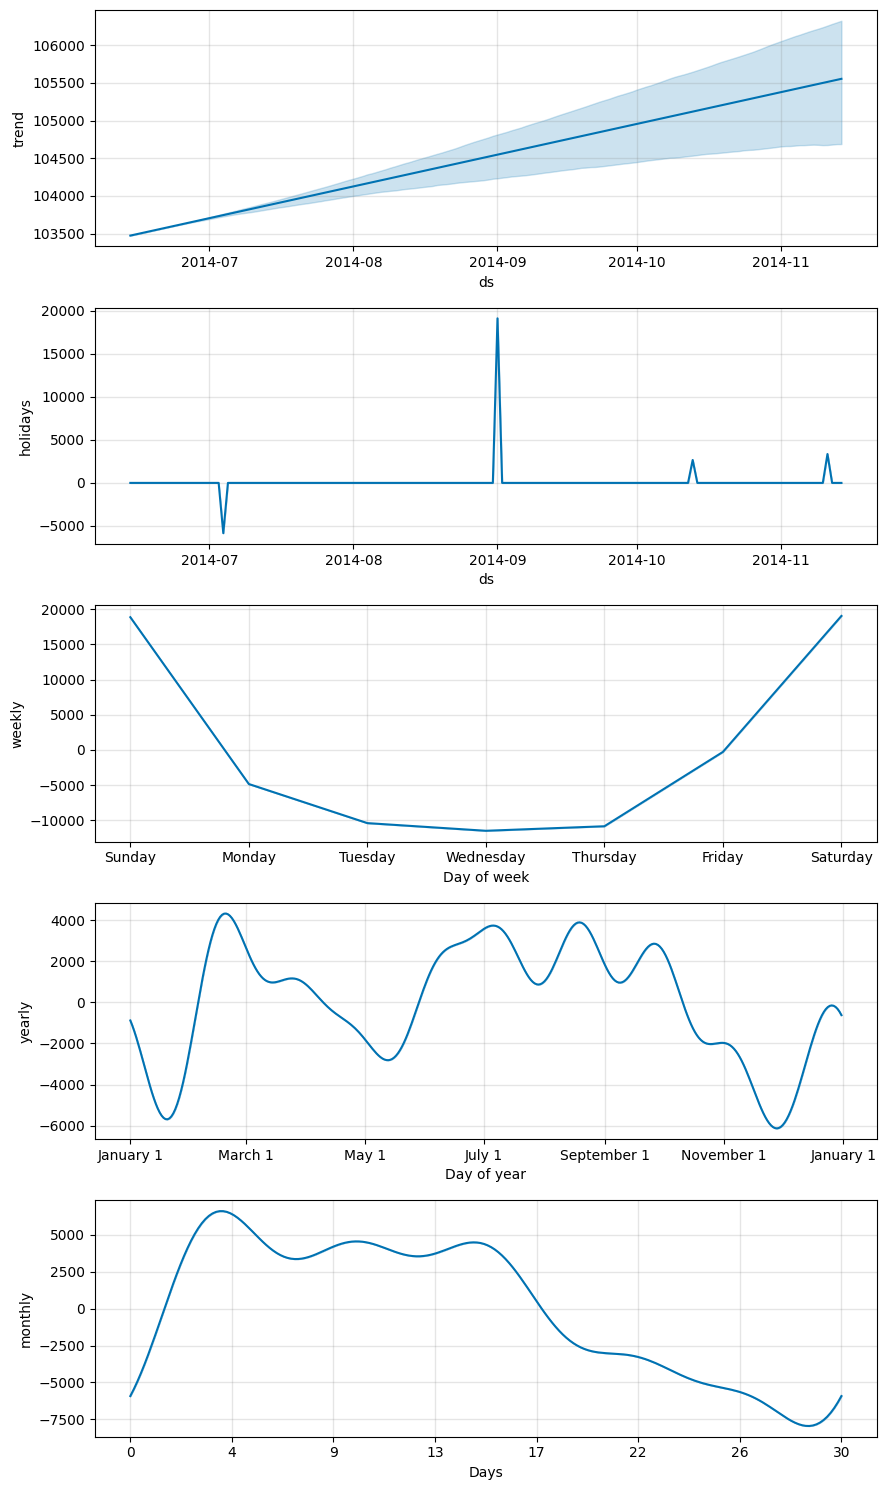

In [63]:
fig8 = prophet2.plot_components(forecast)

In [64]:
future = prophet2.make_future_dataframe(periods=365) 
p_forecast = prophet2.predict(future)

In [65]:
from prophet.plot import plot_plotly

fig9 = plot_plotly(prophet2, p_forecast)
fig9.show()

# VII. Use prophet model for calendar event

**[7.1]** Create holidays dataframe

In [67]:
calendar_events_df=pd.read_csv('/kaggle/input/retail/calendar_events.csv')

In [68]:
# Prepare the holidays DataFrame
holidays = pd.DataFrame({
    'ds': pd.to_datetime(calendar_events_df['date']),
    'holiday': calendar_events_df['event_name']
})

In [69]:
holidays

,ds,holiday
0,2011-02-06,SuperBowl
1,2011-02-14,ValentinesDay
2,2011-02-21,PresidentsDay
3,2011-03-09,LentStart
4,2011-03-16,LentWeek2
...,...,...
162,2016-05-30,MemorialDay
163,2016-06-02,NBAFinalsStart
164,2016-06-07,Ramadan starts
165,2016-06-19,Father's day


In [70]:
from prophet import Prophet
# Initialize the Prophet model with the holidays DataFrame
prophet_event = Prophet(holidays=holidays)

**[7.2]** Fit the model with the prepared data

In [71]:
# Fit the model with your data
prophet_event.fit(df_train)

06:52:34 - cmdstanpy - INFO - Chain [1] start processing
06:52:34 - cmdstanpy - INFO - Chain [1] done processing


**[7.3]** Save the fitted model into the folder `models` as a file called `prophet_event.pkl`

In [72]:
import pickle


# Save the model as a pickle file
with open('/kaggle/working/prophet_event.pkl', 'wb') as file:
    pickle.dump(prophet_event, file)

print(f"Model saved as {file}")

Model saved as <_io.BufferedWriter name='/kaggle/working/prophet_event.pkl'>


**[7.4]** Forecast the future dates with predict() and save the results in a variable called forecast_event

In [73]:
forecast_event = prophet_event.predict(df_train)

**[7.5]** Print MAE, MSE and R2 score

In [74]:
# Calculate metrics for the training set
mse_train = mean_squared_error(df_train['y'],forecast_event['yhat'])
mae_train = mean_absolute_error(df_train['y'], forecast_event['yhat'])
r2_train = r2_score(df_train['y'], forecast_event['yhat'])

In [75]:
forecast_event_test = prophet_event.predict(df_test)
# Calculate metrics for the testing set
mse_test = mean_squared_error(df_test['y'],forecast_event_test['yhat'])
mae_test = mean_absolute_error(df_test['y'], forecast_event_test['yhat'])
r2_test = r2_score(df_test['y'], forecast_event_test['yhat'])

In [76]:
# Print the results
print(f"Training Set: MSE = {mse_train}, MAE = {mae_train}, R-squared = {r2_train}")
print(f"Test Set: MSE = {mse_test}, MAE = {mae_test}, R-squared = {r2_test}")

Training Set: MSE = 48386936.41214134, MAE = 5554.850756798862, R-squared = 0.8739546916777378
Test Set: MSE = 106991998.8457459, MAE = 8435.104314407938, R-squared = 0.7465743147487913


**[7.6]** Print the components of this model on the predictions

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



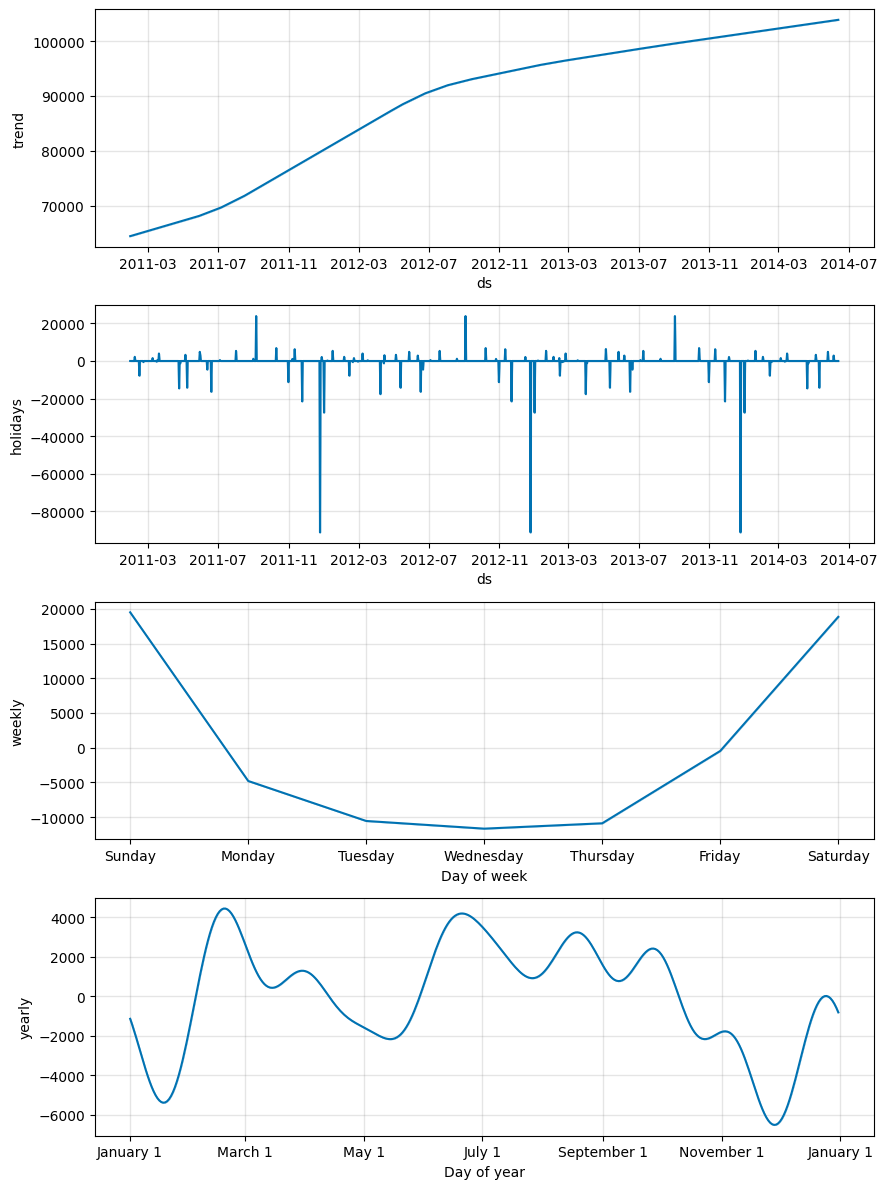

In [77]:
fig10 = prophet_event.plot_components(forecast_event)

In [78]:
# Create future DataFrame and make predictions
future = prophet_event.make_future_dataframe(periods=365)
forecast_event = prophet_event.predict(future)

In [79]:
from prophet.plot import plot_plotly

fig = plot_plotly(prophet_event, forecast_event)
fig.show()